In [3]:
faa <- read.csv("../homework/homework-1/FAA1.csv", header = TRUE, stringsAsFactors = TRUE)  # read in data

In [5]:
head(faa, n = 5)  # print fisrt five rows

,aircraft,duration,no_pasg,speed_ground,speed_air,height,pitch,distance
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,boeing,98.47909,53,107.91568,109.3284,27.41892,4.043515,3369.836
2,boeing,125.73330,69,101.65559,102.8514,27.80472,4.117432,2987.804
3,boeing,112.01700,61,71.05196,NA,18.58939,4.434043,1144.922
4,boeing,196.82569,56,85.81333,NA,30.74460,3.884236,1664.218
5,boeing,90.09538,70,59.88853,NA,32.39769,4.026096,1050.264


In [51]:
table(sapply(faa, class))


 factor integer numeric 
      1       1       6 

In [39]:
str(faa)  # display (str)ucture of an arbitrary object

'data.frame':	800 obs. of  8 variables:
 $ aircraft    : Factor w/ 2 levels "airbus","boeing": 2 2 2 2 2 2 2 2 2 2 ...
 $ duration    : num  98.5 125.7 112 196.8 90.1 ...
 $ no_pasg     : int  53 69 61 56 70 55 54 57 61 56 ...
 $ speed_ground: num  107.9 101.7 71.1 85.8 59.9 ...
 $ speed_air   : num  109 103 NA NA NA ...
 $ height      : num  27.4 27.8 18.6 30.7 32.4 ...
 $ pitch       : num  4.04 4.12 4.43 3.88 4.03 ...
 $ distance    : num  3370 2988 1145 1664 1050 ...


In [40]:
dim(faa)

[1] 800   8

In [41]:
summary(faa)  # print summary of data frame

   aircraft      duration         no_pasg       speed_ground   
 airbus:400   Min.   : 14.76   Min.   :29.00   Min.   : 27.74  
 boeing:400   1st Qu.:119.49   1st Qu.:55.00   1st Qu.: 65.87  
              Median :153.95   Median :60.00   Median : 79.64  
              Mean   :154.01   Mean   :60.13   Mean   : 79.54  
              3rd Qu.:188.91   3rd Qu.:65.00   3rd Qu.: 92.33  
              Max.   :305.62   Max.   :87.00   Max.   :141.22  
                                                               
   speed_air          height           pitch          distance      
 Min.   : 90.00   Min.   :-3.546   Min.   :2.284   Min.   :  34.08  
 1st Qu.: 96.16   1st Qu.:23.338   1st Qu.:3.658   1st Qu.: 900.95  
 Median :100.99   Median :30.147   Median :4.020   Median :1267.44  
 Mean   :103.83   Mean   :30.122   Mean   :4.018   Mean   :1544.52  
 3rd Qu.:109.48   3rd Qu.:36.981   3rd Qu.:4.388   3rd Qu.:1960.44  
 Max.   :141.72   Max.   :59.946   Max.   :5.927   Max.   :6533.05  
 NA's

In [6]:
(edf <- ecdf(faa[, "distance"]))  

Empirical CDF 
Call: ecdf(faa[, "distance"])
 x[1:800] = 34.081, 41.722, 133.09,  ..., 6309.9,   6533

In [43]:
(x <- 3)

[1] 3

In [7]:
summary(edf)

Empirical CDF:	  800 unique values with summary
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34.08  900.95 1267.44 1544.52 1960.44 6533.05 

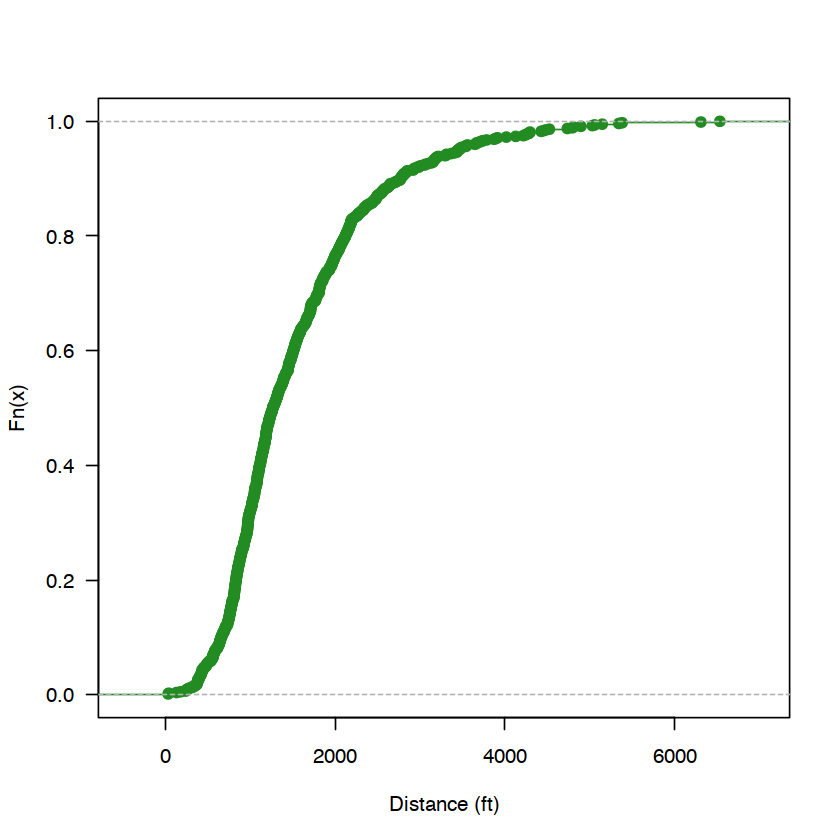

In [45]:
plot(edf, col = "forestgreen", xlab = "Distance (ft)", main = "", las = 1)

In [46]:
edf(2000)  # estimate of Pr(landing distance <= 2000 ft)

[1] 0.76375

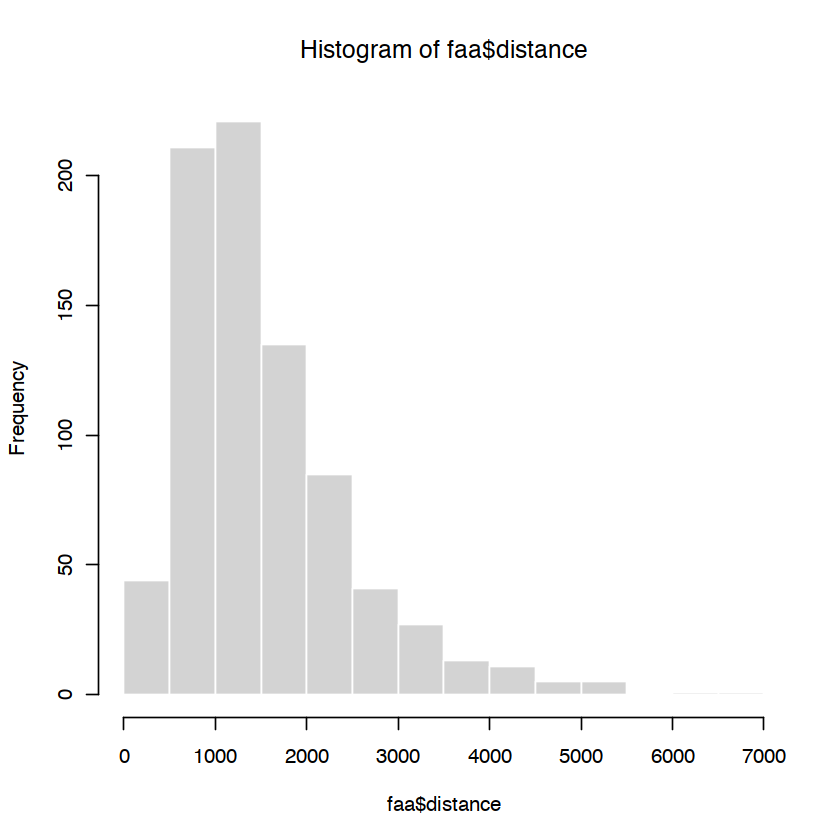

In [53]:
hist(faa$distance, border = "white")

In [6]:
shapiro.test(faa$distance)


	Shapiro-Wilk normality test

data:  faa$distance
W = 0.87205, p-value < 2.2e-16


In [9]:
x1 <- rt(5000, df = 50)
x2 <- rt(10, df = 50)
shapiro.test(x1)
shapiro.test(x2)


	Shapiro-Wilk normality test

data:  x1
W = 0.99918, p-value = 0.0184



	Shapiro-Wilk normality test

data:  x2
W = 0.95002, p-value = 0.6687


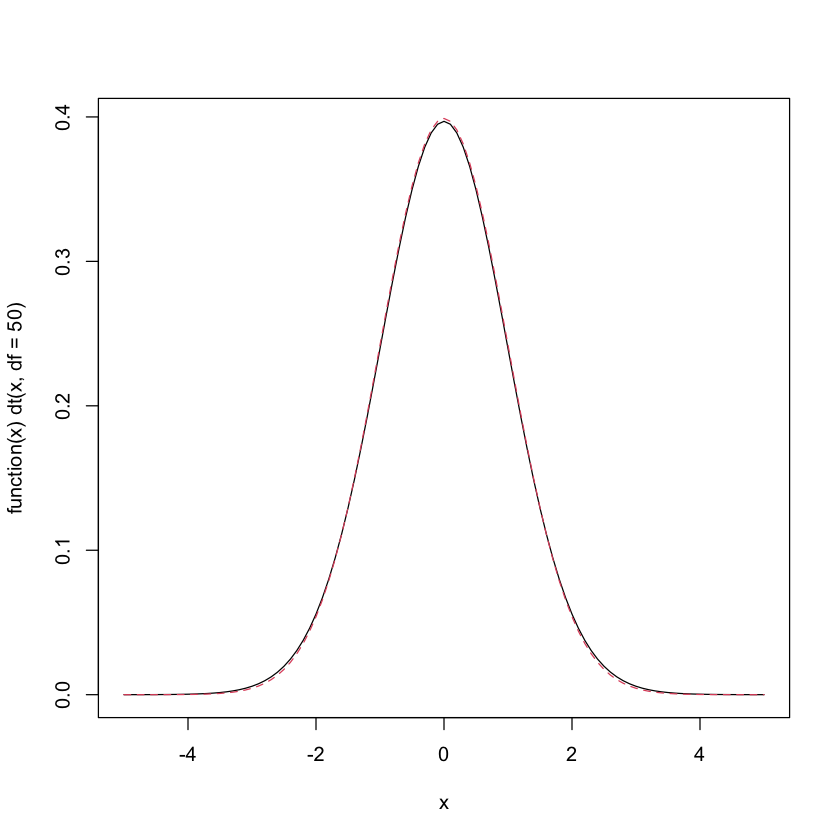

In [10]:
plot(function(x) dt(x, df = 50), xlim = c(-5, 5))  # t-distribution with 50 d.f.
curve(dnorm, lty = 2, col = 2, add = TRUE)         # standard normal distribution

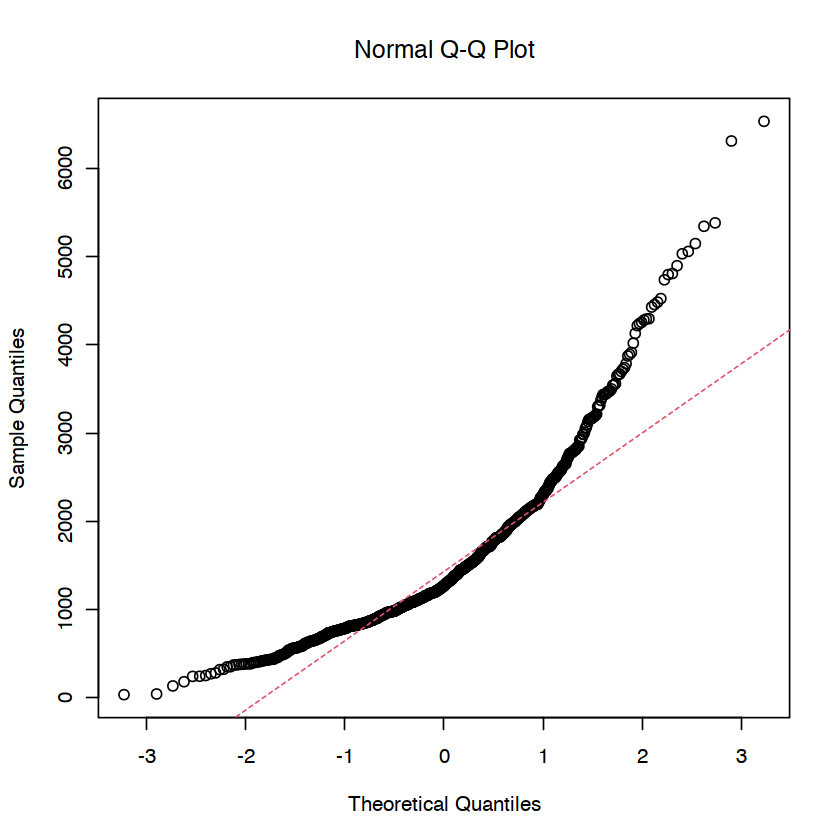

In [54]:
qqnorm(faa$distance)  
qqline(faa$distance, col = 2, lty = 2)

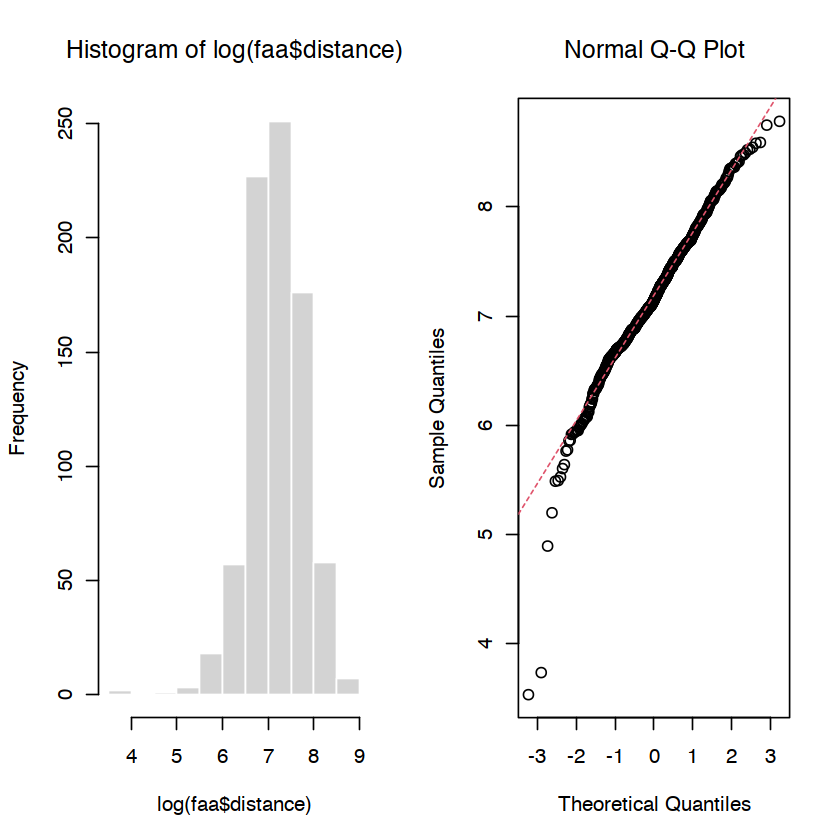

In [56]:
par(mfrow = c(1, 2))
hist(log(faa$distance), border = "white")
qqnorm(log(faa$distance))  
qqline(log(faa$distance), col = 2, lty = 2)

In [11]:
(model <- lm(distance ~ speed_ground, data = faa))


Call:
lm(formula = distance ~ speed_ground, data = faa)

Coefficients:
 (Intercept)  speed_ground  
    -1804.87         42.11  


In [12]:
summary(model)


Call:
lm(formula = distance ~ speed_ground, data = faa)

Residuals:
    Min      1Q  Median      3Q     Max 
-957.96 -323.26  -82.72  207.20 2391.37 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1804.8738    71.3171  -25.31   <2e-16 ***
speed_ground    42.1088     0.8715   48.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 473.8 on 798 degrees of freedom
Multiple R-squared:  0.7453,	Adjusted R-squared:  0.7449 
F-statistic:  2335 on 1 and 798 DF,  p-value: < 2.2e-16


In [60]:
predict(model, newdata = faa[1:3, ])

1        2        3 
2739.327 2475.722 1187.040

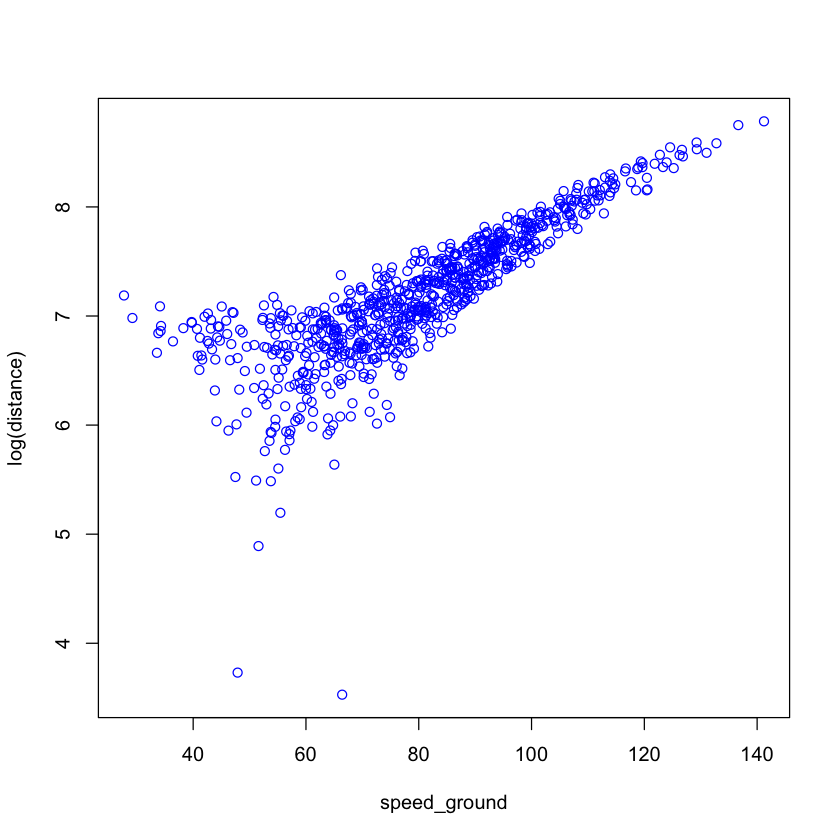

In [24]:
plot(log(distance) ~ speed_ground, data = faa, col = "blue")
#abline(lm(log(distance) ~ speed_ground, data = faa), lwd = 2)

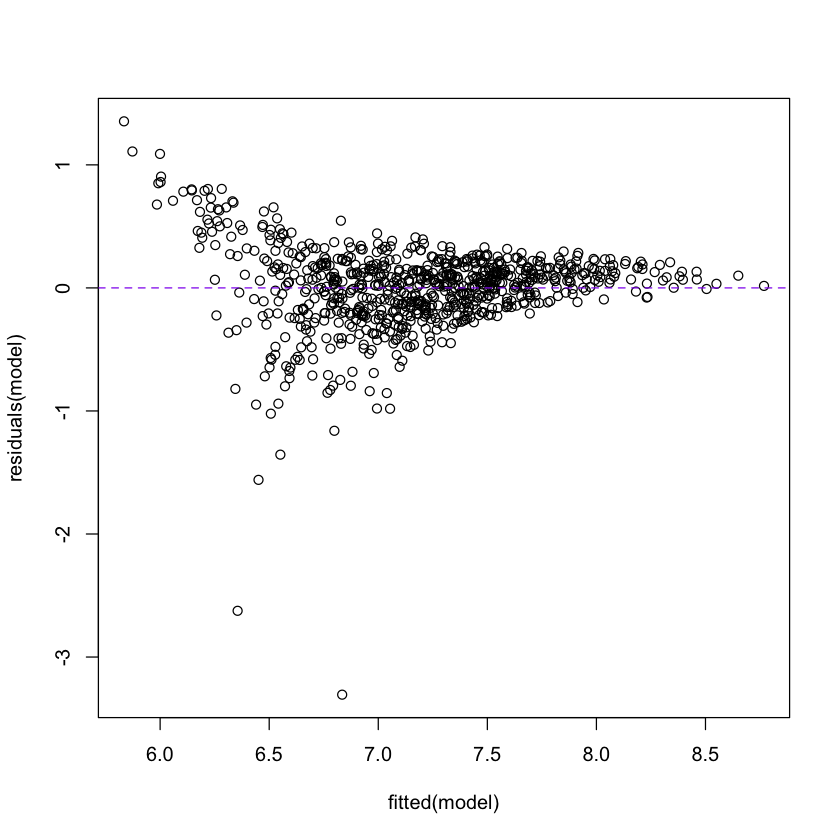

In [17]:
plot(fitted(model), residuals(model)); abline(h = 0, lty = 2, col = "purple2")

In [ ]:
sigma(model)

In [ ]:
head(predict(model, newdata = faa[1:3, ]))

In [ ]:
head(fitted(model))

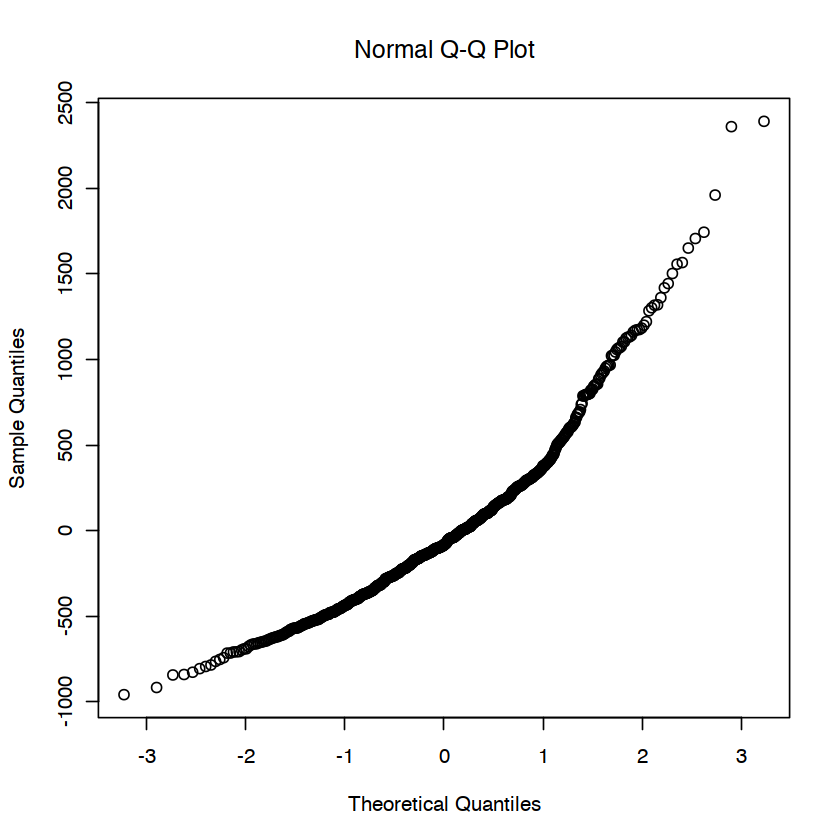

In [63]:
qqnorm(residuals(model))

In [ ]:
all.equal(residuals(model), faa$distance - predict(model))

In [ ]:
logd <- log(faa$distance)  # log transform
hist(logd, breaks = 20)

In [ ]:
(t.obs <- (mean(logd) - 6) / (sd(logd) / sqrt(length(logd) - 1)))  # (xbar - mu) / (s / sqrt(n))

In [ ]:
 (p.val <- 2 * pt(t.obs, df = length(logd) - 1, lower.tail = FALSE))  # 2 * Pr(T > |t.obs|)

In [64]:
model2 <- lm(distance ~ speed_ground + height, data = faa)
summary(model2)


Call:
lm(formula = distance ~ speed_ground + height, data = faa)

Residuals:
    Min      1Q  Median      3Q     Max 
-770.11 -338.13  -61.38  172.99 2477.18 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2221.6518    83.0683 -26.745   <2e-16 ***
speed_ground    42.1691     0.8328  50.636   <2e-16 ***
height          13.6771     1.5588   8.774   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 452.8 on 797 degrees of freedom
Multiple R-squared:  0.7677,	Adjusted R-squared:  0.7671 
F-statistic:  1317 on 2 and 797 DF,  p-value: < 2.2e-16


In [ ]:
var(faa$distance)

In [ ]:
var(predict(model2))

In [ ]:
var(residuals(model2))

In [ ]:
var(predict(model2)) + var(residuals(model2))

In [ ]:
var(predict(model2)) / var(faa$distance)  # what is this ratio?

In [65]:
summary(model3 <- lm(distance ~ speed_ground + height + duration, data = faa))


Call:
lm(formula = distance ~ speed_ground + height + duration, data = faa)

Residuals:
    Min      1Q  Median      3Q     Max 
-750.11 -337.94  -59.48  178.31 2483.13 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2193.9527    99.4214 -22.067   <2e-16 ***
speed_ground    42.1434     0.8347  50.488   <2e-16 ***
height          13.6713     1.5596   8.766   <2e-16 ***
duration        -0.1654     0.3259  -0.508    0.612    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 453 on 796 degrees of freedom
Multiple R-squared:  0.7678,	Adjusted R-squared:  0.7669 
F-statistic: 877.2 on 3 and 796 DF,  p-value: < 2.2e-16


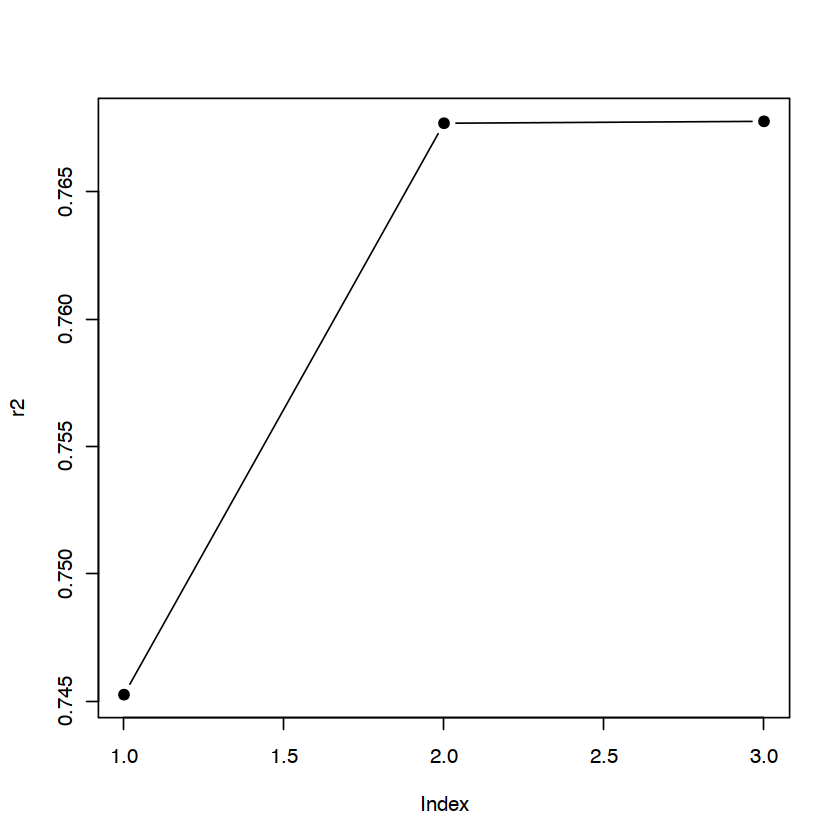

In [66]:
models <- list(model, model2, model3)
r2 <- sapply(models, FUN = function(lin.mod) summary(lin.mod)$r.squared)
plot(r2, type = "b", pch = 19)

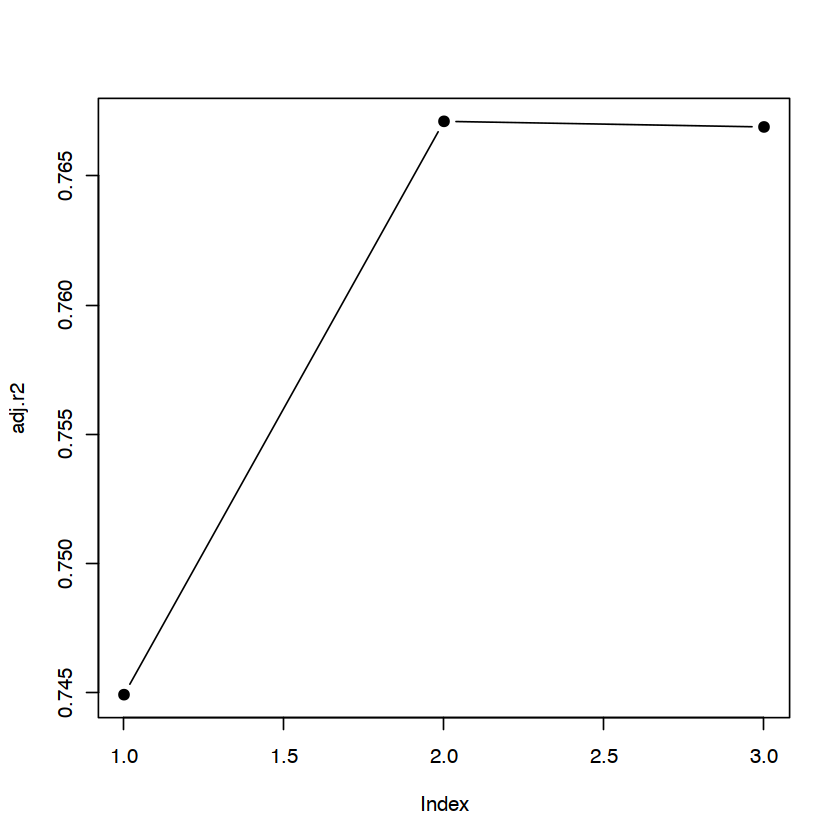

In [67]:
models <- list(model, model2, model3)
adj.r2 <- sapply(models, FUN = function(lin.mod) summary(lin.mod)$adj.r.squared)
plot(adj.r2, type = "b", pch = 19)

In [ ]:
(BICs <- sapply(models, FUN = BIC))  # smaller is better (could use AIC as well)

In [ ]:
which.min(BICs)